In [3]:
import sympy
from qadence import RX, RY, RZ, CNOT, Z, run, chain, kron, FeatureParameter, VariationalParameter

phi = FeatureParameter("phi")
theta = VariationalParameter("theta")

block = chain(
    kron(
        RX(0, phi/theta),
        RY(1, theta*2),
        RZ(2, sympy.cos(phi)),
    ),
    kron(
        RX(0, phi),
        RY(1, theta),
        RZ(2, phi),
    ),
    kron(
        RX(0, phi),
        RY(1, theta),
        RZ(2, phi),
    ),
    kron(
        RX(0, phi + theta),
        RY(1, theta**2),
        RZ(2, sympy.cos(phi)),
    ),
    chain(CNOT(0,1), CNOT(1,2))
)
block.tag = "Rotations"

obs = 2*kron(*map(Z, range(3)))
block = chain(block, obs)



In [4]:
from qadence.draw import display

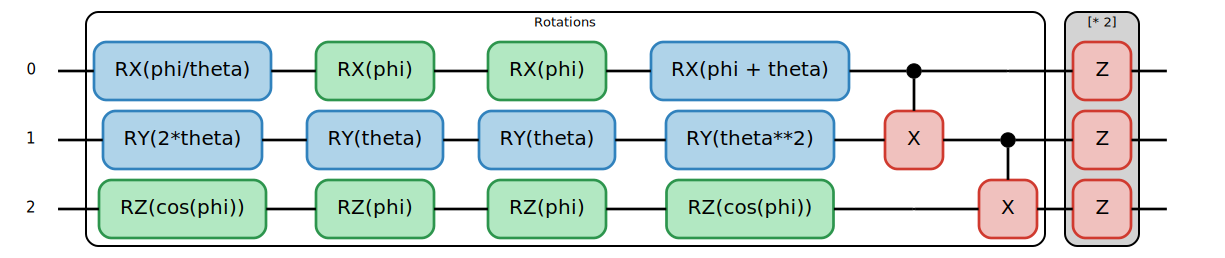

In [5]:
display(block)

In [13]:
from qadence import QuantumModel, QuantumCircuit, BackendName, DiffMode
circuit = QuantumCircuit(3, block)
model = QuantumModel(circuit, backend=BackendName.PYQTORCH, diff_mode=DiffMode.AD)

In [20]:
from collections import OrderedDict
from torch import tensor
circuit.vparams_value = OrderedDict([('theta', tensor([0.6122]))])

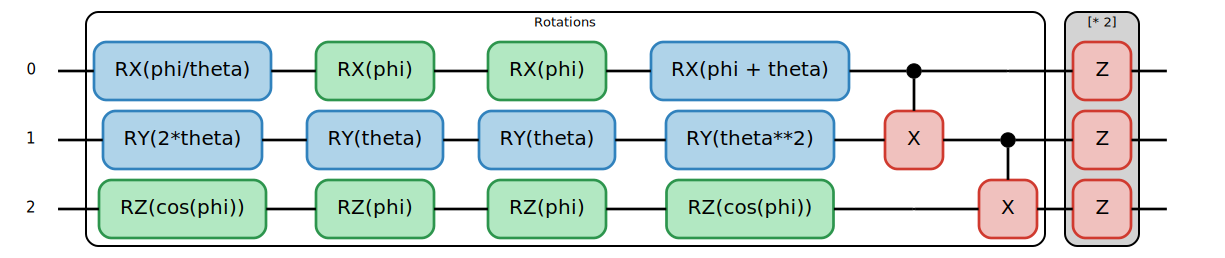

In [21]:
display(circuit)

In [22]:
tensor([0.6122])

tensor([0.6122])